In [62]:
import numpy as np
import pandas as pd

data_set = pd.read_csv('adult.csv')
data_set.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
len(data_set[data_set['income']=='>50K'])

7841

In [64]:
len(data_set[data_set['income']=='<=50K'])

24720

In [65]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Pre-Processing 

In [66]:
# Let's see how many unique categories we have in this property
occupation_set = set(data_set['occupation'])
print(occupation_set)

{'Tech-support', 'Protective-serv', '?', 'Handlers-cleaners', 'Transport-moving', 'Priv-house-serv', 'Craft-repair', 'Sales', 'Armed-Forces', 'Machine-op-inspct', 'Prof-specialty', 'Farming-fishing', 'Other-service', 'Adm-clerical', 'Exec-managerial'}


In [67]:
data_set['occupation'] = data_set['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [68]:
marital_set = set(data_set['marital.status'])
print(marital_set)

{'Divorced', 'Married-AF-spouse', 'Widowed', 'Separated', 'Married-spouse-absent', 'Never-married', 'Married-civ-spouse'}


In [69]:
data_set['marital.status'] = data_set['marital.status'].map({'Divorced': 0, 'Married-spouse-absent': 1, 'Separated': 2, 
                                                       'Never-married': 3, 'Married-AF-spouse': 4, 'Widowed': 5,
                                                       'Married-civ-spouse': 6}).astype(int)

In [70]:
set(data_set['sex'])

{'Female', 'Male'}

In [71]:
data_set['sex'] = data_set['sex'].map({'Female': 0, 'Male': 1}).astype(int)

In [72]:
race_set = set(data_set['race'])
print(race_set)

{'Asian-Pac-Islander', 'Other', 'White', 'Black', 'Amer-Indian-Eskimo'}


In [73]:
data_set['race'] = data_set['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [74]:
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,5,0,Not-in-family,3,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,5,7,Not-in-family,3,0,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,5,0,Unmarried,0,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,0,6,Unmarried,3,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,2,5,Own-child,3,0,0,3900,40,United-States,<=50K


#### Binary encoding the output 

In [75]:
income_set = set(data_set['income'])
print(income_set)

{'<=50K', '>50K'}


In [76]:
data_set['income'] = data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [77]:
data_set.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,5,0,Not-in-family,3,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,5,7,Not-in-family,3,0,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,5,0,Unmarried,0,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,0,6,Unmarried,3,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,2,5,Own-child,3,0,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,0,13,Unmarried,3,0,0,3770,45,United-States,0
6,38,Private,150601,10th,6,2,3,Unmarried,3,1,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,3,5,Other-relative,3,0,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,0,5,Not-in-family,3,0,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,3,9,Unmarried,3,1,0,3004,60,?,1


## Corelation map

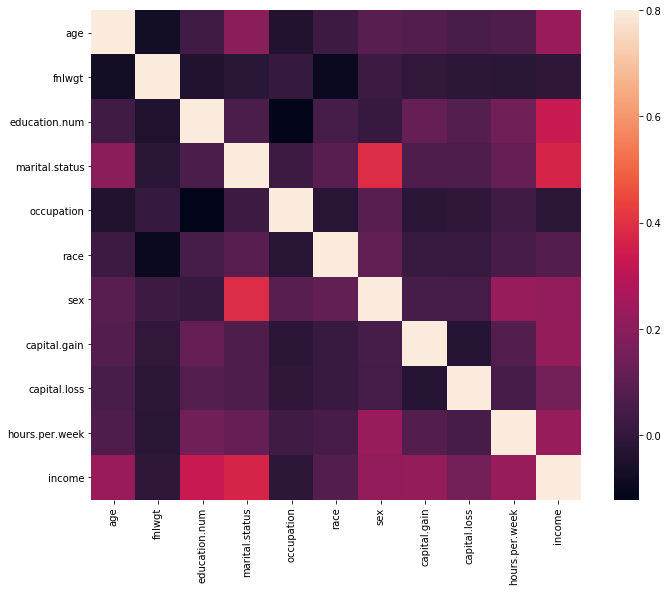

In [15]:
import seaborn as sns
import matplotlib.pyplot as pplt
%matplotlib inline
#correlation matrix
corrmat = data_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Setting Up decision tree:

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data_set[['education.num', 'occupation', 'age', 'sex', 'marital.status']]

Y = data_set['income']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:

classifier = DecisionTreeClassifier()
# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7997850452940273


In [84]:
def pred(data,classifier=classifier):
    p = classifier.predict(data)
    if p[0] == 0:
        print (">50k")
    else:
        print("<50k")

In [85]:
point= [[8,2,18,1,4]]
pred(point)

>50k


In [86]:
point = [[9, 1, 24, 1, 3]]
pred(point)

>50k


In [87]:
point = [[9,0,90,0,5]]
pred(point)

>50k


In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)

clf.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = clf.score(x_test, y_test)

print(score)

0.8182097343773991


In [88]:
point = [[9,0,90,0,5]]
pred(point, classifier=clf)

>50k


In [89]:
point = [[3,0,10,0,5]]
pred(point, classifier=clf)

>50k


In [35]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(x_test)
confusion_matrix(y_true, y_pred)


array([[4749,  217],
       [ 967,  580]], dtype=int64)

[[4749  217]
 [ 967  580]]


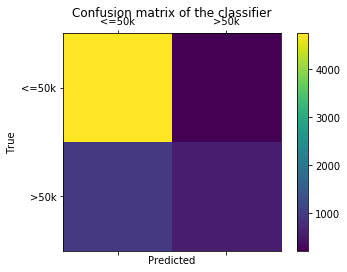

In [50]:
import matplotlib.pyplot as plt

labels = ['<=50k', '>50k']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

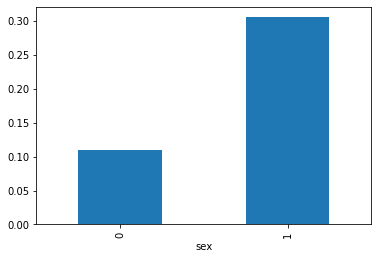

In [51]:
data_set.groupby('sex').income.mean().plot(kind='bar')

In [90]:
point = [[9,7,90,0,5]]
pred(point,clf)

>50k


In [91]:
point= [[9,7,66,0,5]]
pred (point)

>50k


In [92]:
point= [[15,5,44,0,3]]
pred(point)

<50k
